In [6]:
import pandas as pd
import numpy as np

from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Read Normalized Data

filepath = "./GEO Samples/train_data_Normalized.csv"
train_data = pd.read_csv(filepath)
X_train = train_data.drop(['Stage'], axis=1)
y_train = train_data[['Stage']]

filepath = "./GEO Samples/test_data_Normalized.csv"
test_data = pd.read_csv(filepath)
X_test = test_data.drop(['Stage'], axis=1)
y_test = test_data[['Stage']]

In [8]:
features_count = X_train.shape[1]
features_count

2550

## PyTorch Model

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

NUM_CLASSES = 4
BATCH_SIZE = 10
EPOCHS = 200
LEARNING_RATE = 0.001

In [2]:
# Convert to float32 and torch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)

# Convert y from [1, 2, 3, 4] → [0, 1, 2, 3]
y_train_tensor = torch.tensor(y_train.values - 1, dtype=torch.long).squeeze()
y_test_tensor = torch.tensor(y_test.values - 1, dtype=torch.long).squeeze()


NameError: name 'X_train' is not defined

In [34]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [35]:
# Define the model
class CustomNN(nn.Module):
    def __init__(self):
        super(CustomNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(features_count, 10),
            nn.ReLU(),
            nn.Linear(10, 50),
            nn.ReLU(),            
            nn.Linear(50, 4)  # 4 output classes
        )

    def forward(self, x):
        return self.model(x)

model = CustomNN()


In [36]:
optimizer = torch.optim.Adam(model.parameters(), lr= LEARNING_RATE)
loss_function = nn.CrossEntropyLoss()

print(f"{optimizer = }")
print(f"{loss_function = }")


optimizer = Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)
loss_function = CrossEntropyLoss()


In [37]:
# Train the model

for epoch in range(EPOCHS):
    model.train()
    total_loss = 0

    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = loss_function(outputs, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {total_loss:.4f}")

   
     #print(f"Train Accuracy: {(100*correct):>0.1f}%")
    
print("Training finished!")


Epoch 1/20, Loss: 5.7008
Epoch 2/20, Loss: 5.3868
Epoch 3/20, Loss: 5.3706
Epoch 4/20, Loss: 5.2144
Epoch 5/20, Loss: 5.3132
Epoch 6/20, Loss: 4.9703
Epoch 7/20, Loss: 4.8233
Epoch 8/20, Loss: 4.6728
Epoch 9/20, Loss: 4.6240
Epoch 10/20, Loss: 4.4728
Epoch 11/20, Loss: 4.3082
Epoch 12/20, Loss: 4.1584
Epoch 13/20, Loss: 3.8808
Epoch 14/20, Loss: 3.7698
Epoch 15/20, Loss: 3.7410
Epoch 16/20, Loss: 3.5618
Epoch 17/20, Loss: 3.4969
Epoch 18/20, Loss: 3.1652
Epoch 19/20, Loss: 3.3390
Epoch 20/20, Loss: 3.2985
Training finished!


In [38]:
# Evaluate the model


def test_train():
    # Test the model
    model.eval()  # set model to evaluation mode
    train_preds = []
    train_labels = []

    with torch.no_grad():
        for X_batch, y_batch in train_loader:
            outputs = model(X_batch)
            _, preds = torch.max(outputs, 1)
            train_preds.extend(preds.numpy())
            train_labels.extend(y_batch.numpy())

    print("Training Accuracy:", accuracy_score(train_labels, train_preds))
    print("Classification Report (Train):\n", classification_report(train_labels, train_preds))
    print("Confusion Matrix (Train):\n", confusion_matrix(train_labels, train_preds))


test_train()


Training Accuracy: 0.7745098039215687
Classification Report (Train):
               precision    recall  f1-score   support

           0       0.77      0.77      0.77        26
           1       0.65      1.00      0.79        26
           2       0.86      0.76      0.81        25
           3       1.00      0.56      0.72        25

    accuracy                           0.77       102
   macro avg       0.82      0.77      0.77       102
weighted avg       0.82      0.77      0.77       102

Confusion Matrix (Train):
 [[20  4  2  0]
 [ 0 26  0  0]
 [ 4  2 19  0]
 [ 2  8  1 14]]


In [39]:
# Evaluate the model


def test():
    # Test the model
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.numpy())
            all_labels.extend(y_batch.numpy())
    print("Accuracy:", accuracy_score(all_labels, all_preds))
    print("Confusion Matrix:\n", confusion_matrix(all_labels, all_preds))
    print("Classification Report:\n", classification_report(all_labels, all_preds))


test()


Accuracy: 0.19230769230769232
Confusion Matrix:
 [[1 4 0 1]
 [3 2 0 1]
 [1 0 1 5]
 [0 2 4 1]]
Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.17      0.18         6
           1       0.25      0.33      0.29         6
           2       0.20      0.14      0.17         7
           3       0.12      0.14      0.13         7

    accuracy                           0.19        26
   macro avg       0.19      0.20      0.19        26
weighted avg       0.19      0.19      0.19        26



## sklearn Model

In [23]:
from sklearn.neural_network import MLPClassifier

MLP_model = MLPClassifier(
    hidden_layer_sizes=(20,32,16),
    activation='relu',
    solver='lbfgs',
    early_stopping=True,
    max_iter=2000,
    random_state=19
)

MLP_model.fit(X_train, y_train["Stage"])

MLPClassifier(early_stopping=True, hidden_layer_sizes=(20, 32, 16),
              max_iter=2000, random_state=19, solver='lbfgs')

MLP Classifier on Train Data
--------------------------
Accuracy: 0.9901960784313726
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        26
           3       0.96      1.00      0.98        25
           4       1.00      0.96      0.98        25

    accuracy                           0.99       102
   macro avg       0.99      0.99      0.99       102
weighted avg       0.99      0.99      0.99       102



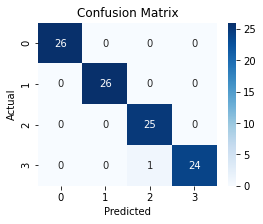

In [24]:
# Predict on tain set
y_pred = MLP_model.predict(X_train)

# Evaluate performance
cm = confusion_matrix(y_train, y_pred)

print("MLP Classifier on Train Data\n--------------------------")
print("Accuracy:", accuracy_score(y_train, y_pred))
print("Classification Report:\n", classification_report(y_train, y_pred))

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

MLP Classifier
--------------------------
Accuracy: 0.19230769230769232
Classification Report:
               precision    recall  f1-score   support

           1       0.25      0.33      0.29         6
           2       0.25      0.33      0.29         6
           3       0.00      0.00      0.00         7
           4       0.12      0.14      0.13         7

    accuracy                           0.19        26
   macro avg       0.16      0.20      0.18        26
weighted avg       0.15      0.19      0.17        26



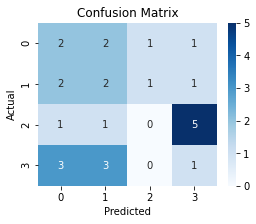

In [25]:
# Predict on test set
y_pred = MLP_model.predict(X_test)

# Evaluate performance
cm = confusion_matrix(y_test, y_pred)

print("MLP Classifier\n--------------------------")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import torch
import torch.nn as nn
epochs = 1000

model = nn.Sequential(
    nn.Linear(764, 100),
    nn.ReLU(),
    nn.Linear(100, 50),
    nn.ReLU(),
    nn.Linear(50, 10),
    nn.Sigmoid()
)

loss_fn = nn.CrossEntropyLoss()
loss = loss_fn(output, label)


optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for n in range(epochs):
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(model)
